In [57]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
dat = pd.read_csv('data/us-covid-imputed-data.csv', parse_dates=True)
# 01/22/20 like date format
dat['date'] = pd.to_datetime(dat['date'], format='%m/%d/%y')

In [59]:
dat.head()

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,2020-01-22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
1,2020-01-23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
2,2020-01-24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
3,2020-01-25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
4,2020-01-26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048


In [60]:
dat.columns

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade', 'daily_state_test',
       'precipitation', 'temperature', 'virus_pressure', 'total_population',
       'female_percent', 'area', 'population_density', 'latitude', 'longitude',
       'hospital_beds_ratio', 'ventilator_capacity_ratio', 'icu_beds_ratio',
       'houses_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'total_college_population', 'percent_smokers', 'percent_diabetes',
       'Religious_congregation_ratio', 'political_party', 'airport_distance',
       'passenger_load_ratio', 'meat_plants', 'median_household_income',
       'percent_insured', 'deaths_per_100000', 'gdp_per_capita', 'age_0_4',
       'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24', 'age_25_29',
 

In [61]:
#extract month and year from date
dat['month'] = dat['date'].dt.month
dat['year'] = dat['date'].dt.year

In [63]:
# aggregate by the column state_name and produce a new dataframe
dat_state = dat.groupby('state_name')
dat.drop('county_name', axis=1, inplace=True)

In [64]:
dat.head()

,date,county_fips,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,daily_state_test,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,month,year
0,2020-01-22,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
1,2020-01-23,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
2,2020-01-24,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
3,2020-01-25,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
4,2020-01-26,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020


In [25]:
# find and extract numerical columns
num_cols = dat_state.select_dtypes(include=['int64', 'float64']).columns
dat_state[num_cols].head()

,county_fips,state_fips,covid_19_confirmed_cases,covid_19_deaths,daily_state_test,precipitation,temperature,virus_pressure,total_population,female_percent,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
state_name,,,,,,,,,,,,,,,,,,,,,
California,81083140,80304,769685.0,14699.0,7.280020e+08,124960.0,222743.30,764731.460317,9430733743,6632.679513,...,96795,99902,93449,82455,58794,42303,33460,25334,24617,216.777056
Texas,2110080571,2099376,663277.0,13926.0,1.039540e+09,1115568.6,951513.40,608761.199603,6602198618,21465.891084,...,309027,309027,280825,249994,205301,162042,126670,92971,80304,622.557945
Florida,164393760,163476,647539.0,12507.0,2.840887e+08,684551.8,325005.44,578150.532937,4829874520,6682.618155,...,100141,99424,90820,86757,76241,60945,46605,33699,28919,150.858052
New York,465412348,464616,294097.0,18659.0,5.146449e+08,333130.4,151501.06,240593.928571,3442341617,6464.046727,...,101575,101336,91298,79109,57599,42781,35611,28919,28441,334.065577
Illinois,298352065,296599,255947.0,8205.0,3.551552e+08,557850.4,262327.08,220918.840079,2864903994,8728.562938,...,128821,133362,119978,103487,82455,64769,51385,41347,42542,244.796243


In [65]:
#aggregate by the month and year    
dat_month = dat.groupby(['month', 'year'])

,date,county_fips,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,daily_state_test,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,month,year
0,2020-01-22,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,1,2020
1,2020-01-23,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,1,2020
2,2020-01-24,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,1,2020
3,2020-01-25,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,1,2020
4,2020-01-26,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,1,2020
10,2020-02-01,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,2,2020
11,2020-02-02,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,2,2020
12,2020-02-03,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,2,2020
13,2020-02-04,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,2,2020
14,2020-02-05,1003,1,Alabama,0.0,0.0,F,F,F,0.000000,...,7,7,6,4,3,2,2,0.021048,2,2020


<Axes: xlabel='covid_19_confirmed_cases', ylabel='covid_19_deaths'>

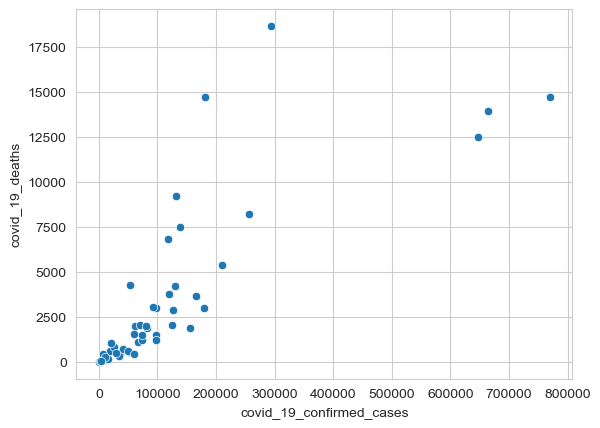

In [6]:
# plot covid_19_confirmed_cases and covid_19_deaths across states
sns.scatterplot(x='covid_19_confirmed_cases', y='covid_19_deaths', data=dat_state)

<Axes: xlabel='icu_beds_ratio', ylabel='covid_19_confirmed_cases'>

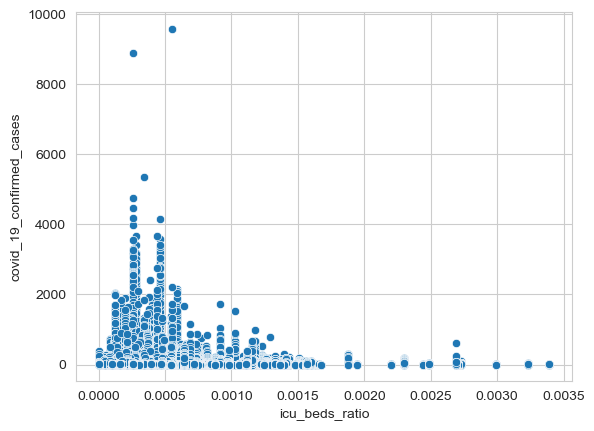

In [79]:
sns.scatterplot(dat, x = 'icu_beds_ratio', y='covid_19_confirmed_cases')

In [80]:
# build a decesion tree model to predict covid_19_confirmed_cases using all numerical columns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error